# Imports

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from minisom import MiniSom
import umap.umap_ as umap

from dendogram_func import plot_dendrogram
from silhouette import plot_silhouette
from dbscan_auxiliary_func import get_kdist_plot
from visualization_umap import visualize_dimensionality_reduction_umap
from radar_plot import create_radar_chart
from hierarchical_func import fit_and_predict_clusters

# Importing the datasets and looking ate them

In [42]:
customer_basket = pd.read_csv("customer_basket.csv", index_col = "invoice_id")
customer_info = pd.read_csv("customer_info.csv", index_col = "customer_id", parse_dates=['customer_birthdate']).drop(columns = "Unnamed: 0")

C:\Users\joaof\AppData\Local\Temp\ipykernel_15004\806404759.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_info = pd.read_csv("customer_info.csv", index_col = "customer_id", parse_dates=['customer_birthdate']).drop(columns = "Unnamed: 0")


In [3]:
customer_info

,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,David Frink,male,1964-05-15 22:34:00,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,...,4056.0,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,NaN,38.735637,-9.149071
43460,Belinda Terry,female,1988-03-26 23:06:00,1.0,0.0,1.0,2.0,5015.0,1334.0,8.0,...,1925.0,2115.0,1028.0,1987.0,2566.0,0.206227,2014.0,NaN,38.762702,-9.160802
23937,Evelyn Calico,female,1969-04-13 18:07:00,0.0,1.0,1.0,3.0,3097.0,4073.0,10.0,...,2347.0,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,951127.0,38.717431,-9.165105
2431,Ora Boggess,female,1941-06-15 03:26:00,0.0,0.0,0.0,1.0,10825.0,207.0,17.0,...,151.0,53.0,0.0,4135.0,70.0,0.215852,2007.0,958680.0,38.782169,-9.150318
10090,Lonnie Hopson,male,2001-12-18 03:03:00,0.0,0.0,0.0,1.0,697.0,570.0,NaN,...,172.0,587.0,223.0,64.0,4.0,0.181023,2024.0,977059.0,38.770397,-9.177024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,Amelia Crawford,female,1983-08-28 11:43:00,1.0,1.0,0.0,1.0,7189.0,6293.0,17.0,...,3779.0,1748.0,4387.0,2812.0,14.0,0.233259,2016.0,NaN,38.760694,-9.166146
24856,Silvia Ramos,female,1992-09-21 19:16:00,1.0,1.0,1.0,1.0,11238.0,11490.0,12.0,...,3893.0,1621.0,3831.0,2726.0,25.0,0.060977,2014.0,909859.0,38.760280,-9.166643
21373,Addie Coronel,female,1994-02-20 05:58:00,0.0,0.0,0.0,1.0,6059.0,241.0,12.0,...,142.0,179.0,0.0,11242.0,44.0,0.097672,2017.0,NaN,38.769923,-9.181550


In [4]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 39634 to 5120
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   customer_name                            43631 non-null  object        
 1   customer_gender                          43631 non-null  object        
 2   customer_birthdate                       43631 non-null  datetime64[ns]
 3   kids_home                                43107 non-null  float64       
 4   teens_home                               42610 non-null  float64       
 5   number_complaints                        42977 non-null  float64       
 6   distinct_stores_visited                  42322 non-null  float64       
 7   lifetime_spend_groceries                 43631 non-null  float64       
 8   lifetime_spend_electronics               43631 non-null  float64       
 9   typical_hour                             

In [5]:
customer_info.iloc[:,20:22].info()

<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 39634 to 5120
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year_first_transaction  43631 non-null  float64
 1   loyalty_card_number     24654 non-null  float64
dtypes: float64(2)
memory usage: 1022.6 KB


In [6]:
customer_info.duplicated().sum()

0

# Some visualizations

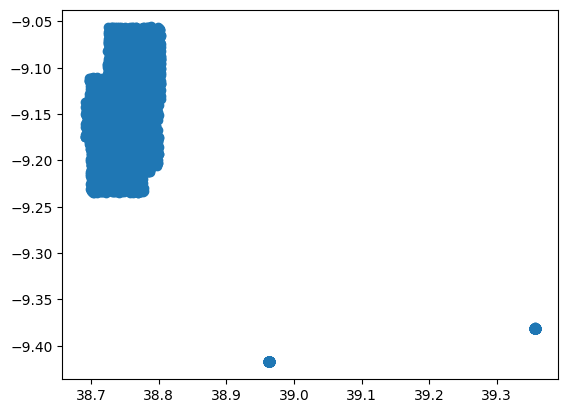

In [10]:
#Plotting longitude and latitude
plt.scatter(x = customer_info["latitude"], y= customer_info["longitude"])
plt.show()

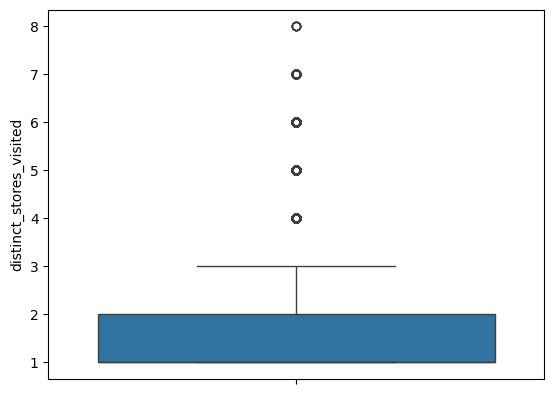

In [11]:
sns.boxplot(data = customer_info, y = "distinct_stores_visited")
plt.show()

In [12]:
customer_info[["lifetime_spend_fish"]]

,lifetime_spend_fish
customer_id,
39634,4056.0
43460,1925.0
23937,2347.0
2431,151.0
10090,172.0
...,...
48487,3779.0
24856,3893.0
21373,142.0


In [13]:
customer_info[["lifetime_spend_fish"]].value_counts()

lifetime_spend_fish
1.0                    3298
0.0                    2624
2.0                     865
3.0                     101
318.0                    42
                       ... 
3079.0                    1
3077.0                    1
3067.0                    1
3065.0                    1
50381.0                   1
Name: count, Length: 4770, dtype: int64

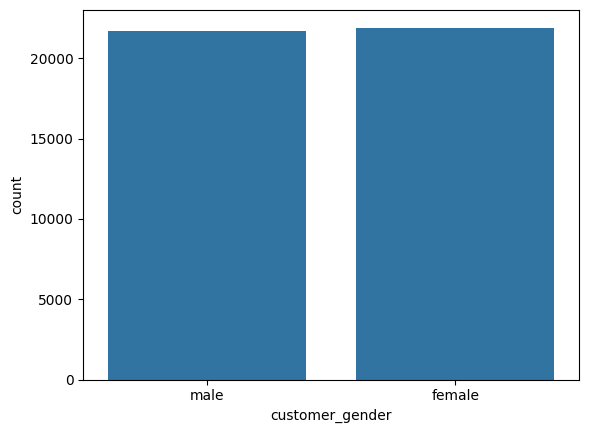

In [14]:
sns.countplot(x='customer_gender', data=customer_info)
plt.show()

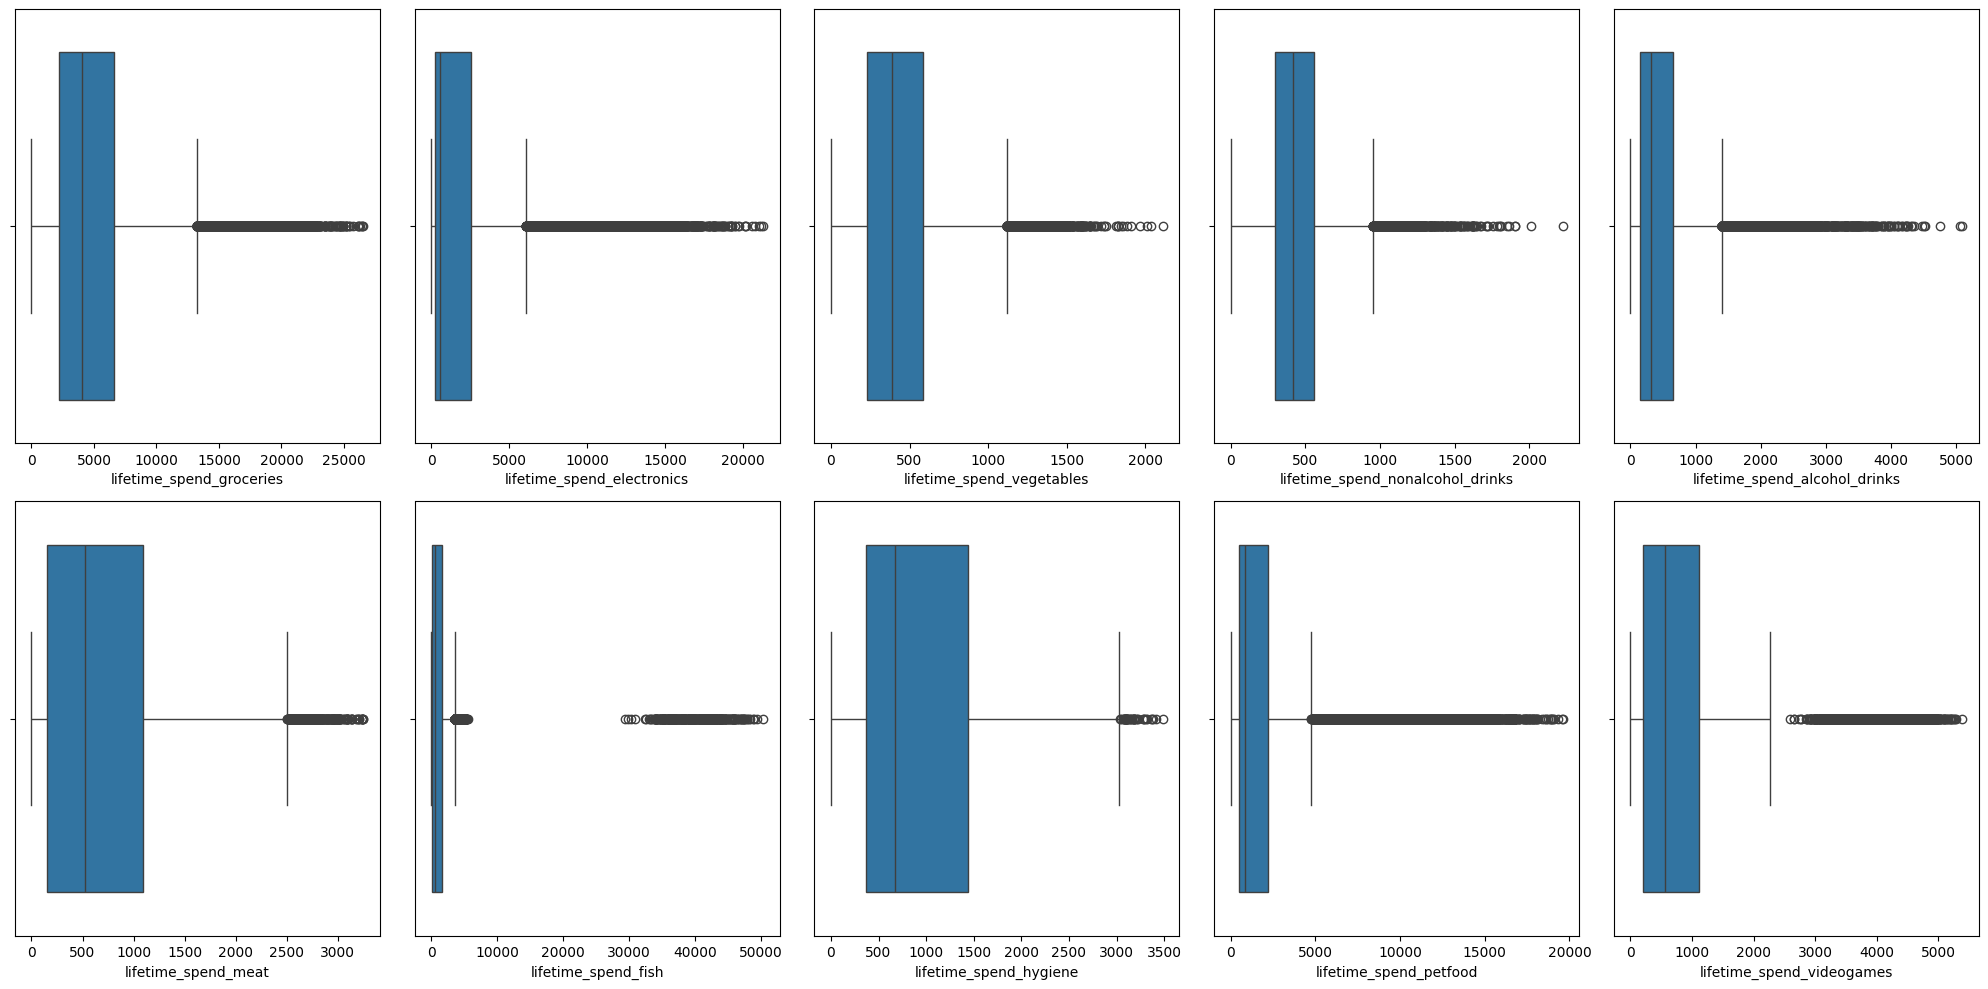

In [15]:
columns = ['lifetime_spend_groceries','lifetime_spend_electronics', 'lifetime_spend_vegetables',
           'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
            'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
             'lifetime_spend_petfood', 'lifetime_spend_videogames']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
for i, column in enumerate(columns):
        if i// 5 == 0:
                sns.boxplot(x=customer_info[column], ax=axes[0][i])
        else:
                sns.boxplot(x=customer_info[column], ax=axes[1][i-5])
plt.tight_layout()   
plt.show()

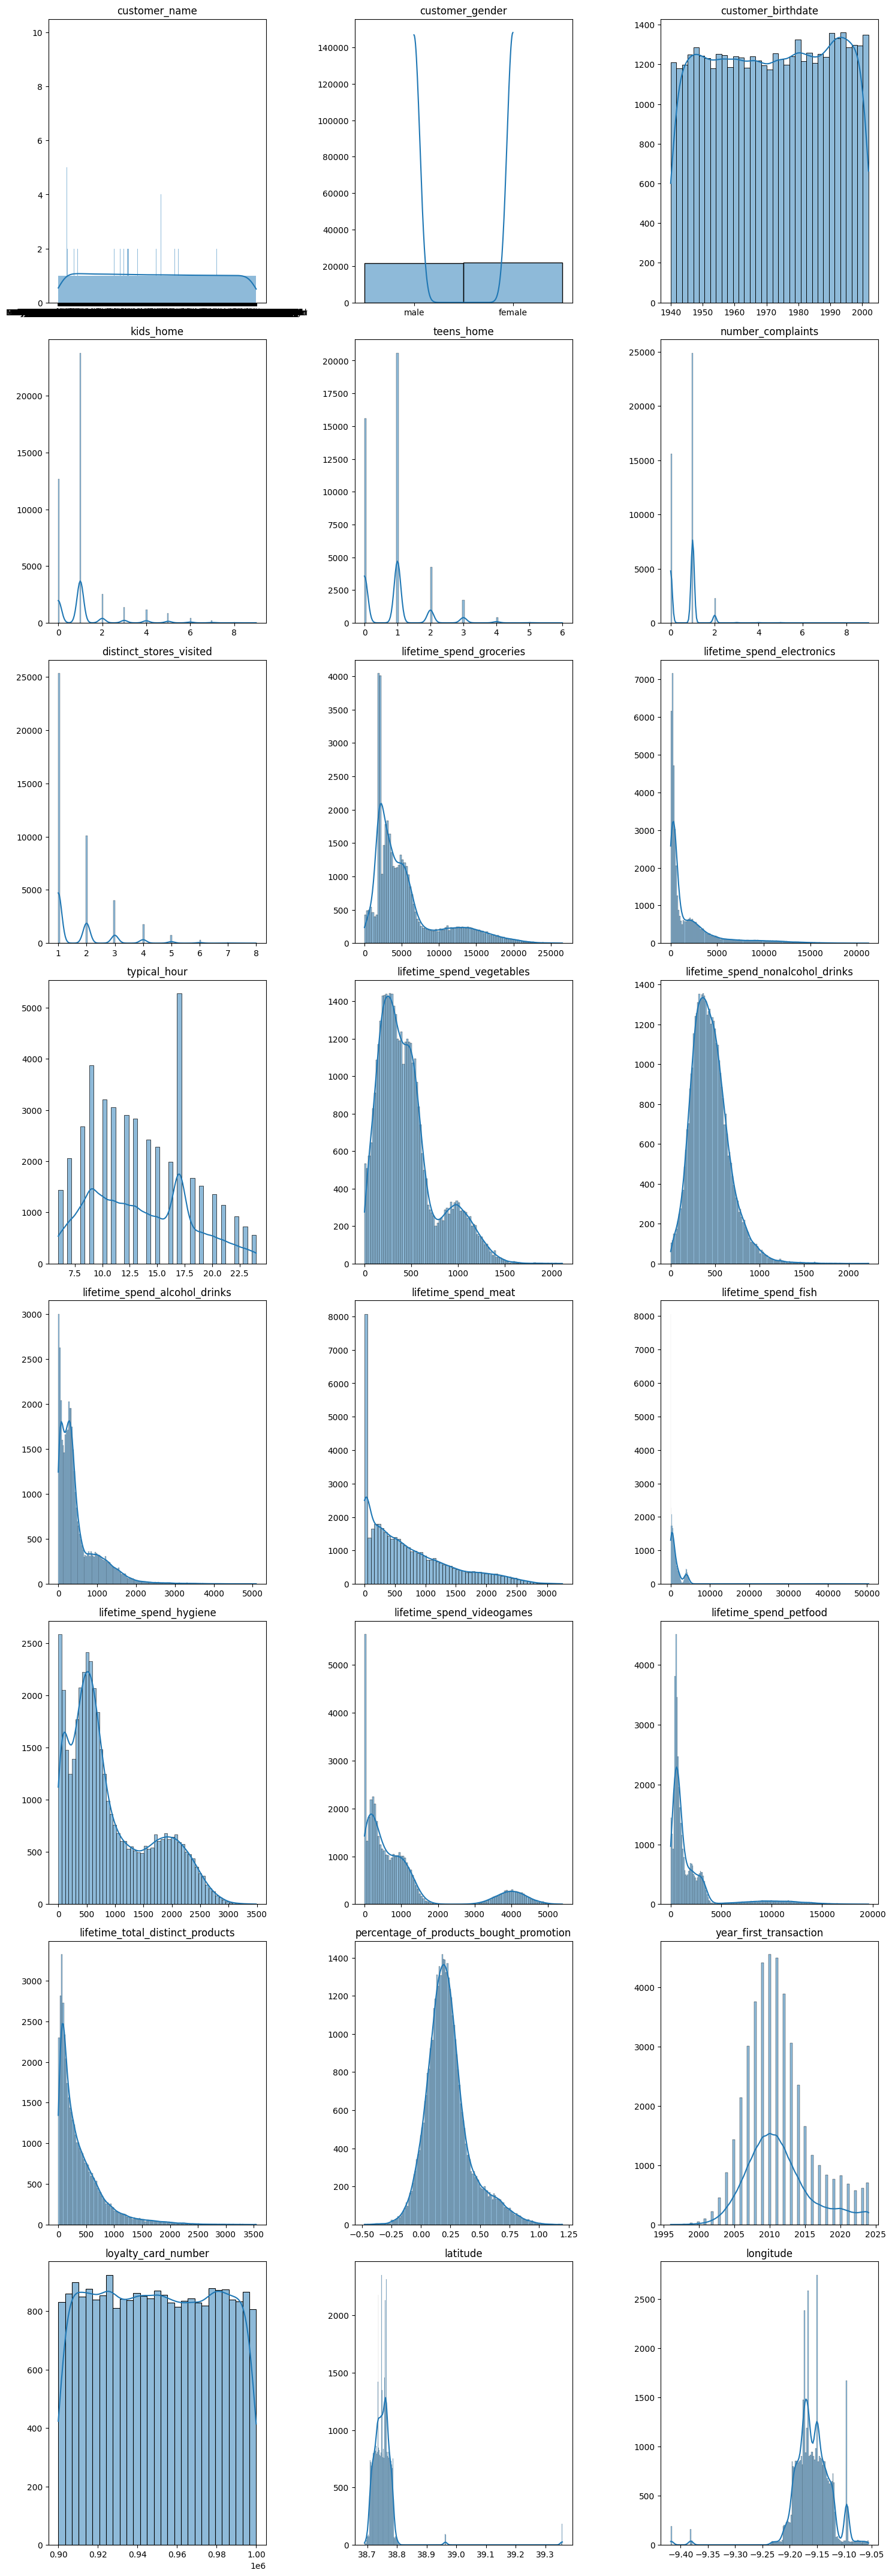

In [16]:
columns_to_visualize = customer_info.columns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(columns_to_visualize)//3 + 1, ncols=3, figsize=(15, len(columns_to_visualize) * 2))

axes = axes.flatten()

# Loop through the columns and create a plot for each
for i, column in enumerate(columns_to_visualize):
    sns.histplot(customer_info[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


# Dealing with some outliers (creating a cluster of just fishermen who spend a lot on fish)

In [43]:
customer_info[customer_info["lifetime_spend_fish"] >6000]

,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
customer_id,,,,,,,,,,,,,,,,,,,,,
48086,Charles`s Fishy,male,1966-09-04 09:18:00,0.0,0.0,1.0,1.0,14998.0,49.0,7.0,...,48432.0,82.0,0.0,0.0,14.0,0.247700,2011.0,NaN,39.356842,-9.380685
31838,Ursula`s Fishy,female,1963-09-20 15:37:00,0.0,0.0,1.0,1.0,13837.0,104.0,9.0,...,45651.0,101.0,0.0,0.0,24.0,-0.038993,2011.0,921411.0,38.963450,-9.417104
41519,Lindsay`s Fishy,female,1956-07-27 18:05:00,0.0,0.0,0.0,1.0,14680.0,167.0,9.0,...,38525.0,148.0,0.0,0.0,33.0,0.399334,2015.0,NaN,38.963252,-9.416521
41076,Carol`s Fishy,female,1942-07-18 08:53:00,0.0,0.0,0.0,1.0,15110.0,357.0,12.0,...,34035.0,80.0,0.0,0.0,34.0,0.282714,2010.0,NaN,39.356766,-9.381005
43120,Rosetta`s Fishy,female,1980-03-30 19:34:00,0.0,0.0,1.0,1.0,16945.0,200.0,9.0,...,39154.0,20.0,0.0,0.0,20.0,0.396175,2011.0,NaN,39.356556,-9.381714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24463,Stephanie`s Fishy,female,1956-04-10 18:50:00,0.0,0.0,1.0,1.0,16382.0,77.0,17.0,...,40584.0,136.0,0.0,0.0,7.0,0.228281,2014.0,917861.0,39.357453,-9.381590
12487,Derrick`s Fishy,male,1973-02-20 00:04:00,0.0,0.0,0.0,1.0,17416.0,170.0,17.0,...,40936.0,72.0,0.0,0.0,29.0,0.315183,2003.0,967028.0,38.962869,-9.416967
14727,Tyler`s Fishy,male,1985-01-10 03:28:00,0.0,0.0,1.0,1.0,14184.0,158.0,9.0,...,40034.0,101.0,0.0,0.0,14.0,0.365210,2010.0,936414.0,38.964179,-9.417103


In [44]:
out_fishermen = customer_info[customer_info["customer_name"].str.contains("Fishy")]

In [45]:
customer_info['Age'] = (pd.to_datetime('2024-05-01') - customer_info['customer_birthdate']).dt.days // 365.25
customer_info

,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,Age
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,David Frink,male,1964-05-15 22:34:00,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,...,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,NaN,38.735637,-9.149071,59.0
43460,Belinda Terry,female,1988-03-26 23:06:00,1.0,0.0,1.0,2.0,5015.0,1334.0,8.0,...,2115.0,1028.0,1987.0,2566.0,0.206227,2014.0,NaN,38.762702,-9.160802,36.0
23937,Evelyn Calico,female,1969-04-13 18:07:00,0.0,1.0,1.0,3.0,3097.0,4073.0,10.0,...,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,951127.0,38.717431,-9.165105,55.0
2431,Ora Boggess,female,1941-06-15 03:26:00,0.0,0.0,0.0,1.0,10825.0,207.0,17.0,...,53.0,0.0,4135.0,70.0,0.215852,2007.0,958680.0,38.782169,-9.150318,82.0
10090,Lonnie Hopson,male,2001-12-18 03:03:00,0.0,0.0,0.0,1.0,697.0,570.0,NaN,...,587.0,223.0,64.0,4.0,0.181023,2024.0,977059.0,38.770397,-9.177024,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,Amelia Crawford,female,1983-08-28 11:43:00,1.0,1.0,0.0,1.0,7189.0,6293.0,17.0,...,1748.0,4387.0,2812.0,14.0,0.233259,2016.0,NaN,38.760694,-9.166146,40.0
24856,Silvia Ramos,female,1992-09-21 19:16:00,1.0,1.0,1.0,1.0,11238.0,11490.0,12.0,...,1621.0,3831.0,2726.0,25.0,0.060977,2014.0,909859.0,38.760280,-9.166643,31.0
21373,Addie Coronel,female,1994-02-20 05:58:00,0.0,0.0,0.0,1.0,6059.0,241.0,12.0,...,179.0,0.0,11242.0,44.0,0.097672,2017.0,NaN,38.769923,-9.181550,30.0


In [46]:
customer_info

,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,Age
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,David Frink,male,1964-05-15 22:34:00,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,...,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,NaN,38.735637,-9.149071,59.0
43460,Belinda Terry,female,1988-03-26 23:06:00,1.0,0.0,1.0,2.0,5015.0,1334.0,8.0,...,2115.0,1028.0,1987.0,2566.0,0.206227,2014.0,NaN,38.762702,-9.160802,36.0
23937,Evelyn Calico,female,1969-04-13 18:07:00,0.0,1.0,1.0,3.0,3097.0,4073.0,10.0,...,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,951127.0,38.717431,-9.165105,55.0
2431,Ora Boggess,female,1941-06-15 03:26:00,0.0,0.0,0.0,1.0,10825.0,207.0,17.0,...,53.0,0.0,4135.0,70.0,0.215852,2007.0,958680.0,38.782169,-9.150318,82.0
10090,Lonnie Hopson,male,2001-12-18 03:03:00,0.0,0.0,0.0,1.0,697.0,570.0,NaN,...,587.0,223.0,64.0,4.0,0.181023,2024.0,977059.0,38.770397,-9.177024,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,Amelia Crawford,female,1983-08-28 11:43:00,1.0,1.0,0.0,1.0,7189.0,6293.0,17.0,...,1748.0,4387.0,2812.0,14.0,0.233259,2016.0,NaN,38.760694,-9.166146,40.0
24856,Silvia Ramos,female,1992-09-21 19:16:00,1.0,1.0,1.0,1.0,11238.0,11490.0,12.0,...,1621.0,3831.0,2726.0,25.0,0.060977,2014.0,909859.0,38.760280,-9.166643,31.0
21373,Addie Coronel,female,1994-02-20 05:58:00,0.0,0.0,0.0,1.0,6059.0,241.0,12.0,...,179.0,0.0,11242.0,44.0,0.097672,2017.0,NaN,38.769923,-9.181550,30.0


# Rebuilding loyalty card and gender variables

In [47]:
customer_info["loyalty_card"] = customer_info["loyalty_card_number"].notnull().astype(int)

In [48]:
customer_info["loyalty_card"]

customer_id
39634    0
43460    0
23937    1
2431     1
10090    1
        ..
48487    0
24856    1
21373    0
19527    1
5120     1
Name: loyalty_card, Length: 43631, dtype: int32

In [49]:
customer_info = pd.get_dummies(customer_info, columns= ["customer_gender"], drop_first= True)

In [50]:
customer_info["customer_gender_male"] = customer_info["customer_gender_male"].apply(lambda x: 1 if x == True else 0)

In [51]:
customer_info["customer_gender_male"]

customer_id
39634    1
43460    0
23937    0
2431     0
10090    1
        ..
48487    0
24856    0
21373    0
19527    0
5120     1
Name: customer_gender_male, Length: 43631, dtype: int64

In [52]:
# Dataframe only for clustering and other preprocessing(for interpretation use customer_info)
customers = customer_info[~customer_info["customer_name"].str.contains("Fishy")]

In [53]:
customers = customers.drop(columns = ["customer_name", "customer_birthdate", "loyalty_card_number", "customer_gender_male"])

# Standardizing Variables

In [103]:
mm = MinMaxScaler().fit(customers)
customers_mm = mm.transform(customers)

In [104]:
customers_scalled = pd.DataFrame(customers_mm, columns = customers.columns, index = customers.index)

In [105]:
customers_scalled.head()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,latitude,longitude,Age,loyalty_card
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,0.111111,0.166667,0.111111,0.142857,0.689440,0.334038,0.611111,0.229167,0.271583,0.185229,...,0.623459,0.732232,0.128291,0.009029,0.328503,0.500000,0.397470,0.478999,0.596774,0.0
43460,0.111111,0.000000,0.111111,0.142857,0.188875,0.062709,0.111111,0.162879,0.168165,0.239049,...,0.606539,0.190759,0.101398,0.724041,0.408523,0.642857,0.636523,0.413765,0.225806,0.0
23937,0.000000,0.166667,0.111111,0.285714,0.116639,0.191463,0.222222,0.142519,0.383094,0.340012,...,0.374534,0.279087,0.102980,0.361738,0.366693,0.464286,0.236664,0.389840,0.532258,1.0
2431,0.000000,0.000000,0.000000,0.000000,0.407691,0.009731,0.611111,0.072443,0.113309,0.011786,...,0.015199,0.000000,0.211012,0.019752,0.414270,0.392857,0.808462,0.472062,0.967742,1.0
10090,0.000000,0.000000,0.000000,0.000000,0.026250,0.026795,NaN,0.003788,0.014838,0.556472,...,0.168340,0.041381,0.003266,0.001129,0.393475,1.000000,0.704482,0.323561,0.000000,1.0


<Axes: >

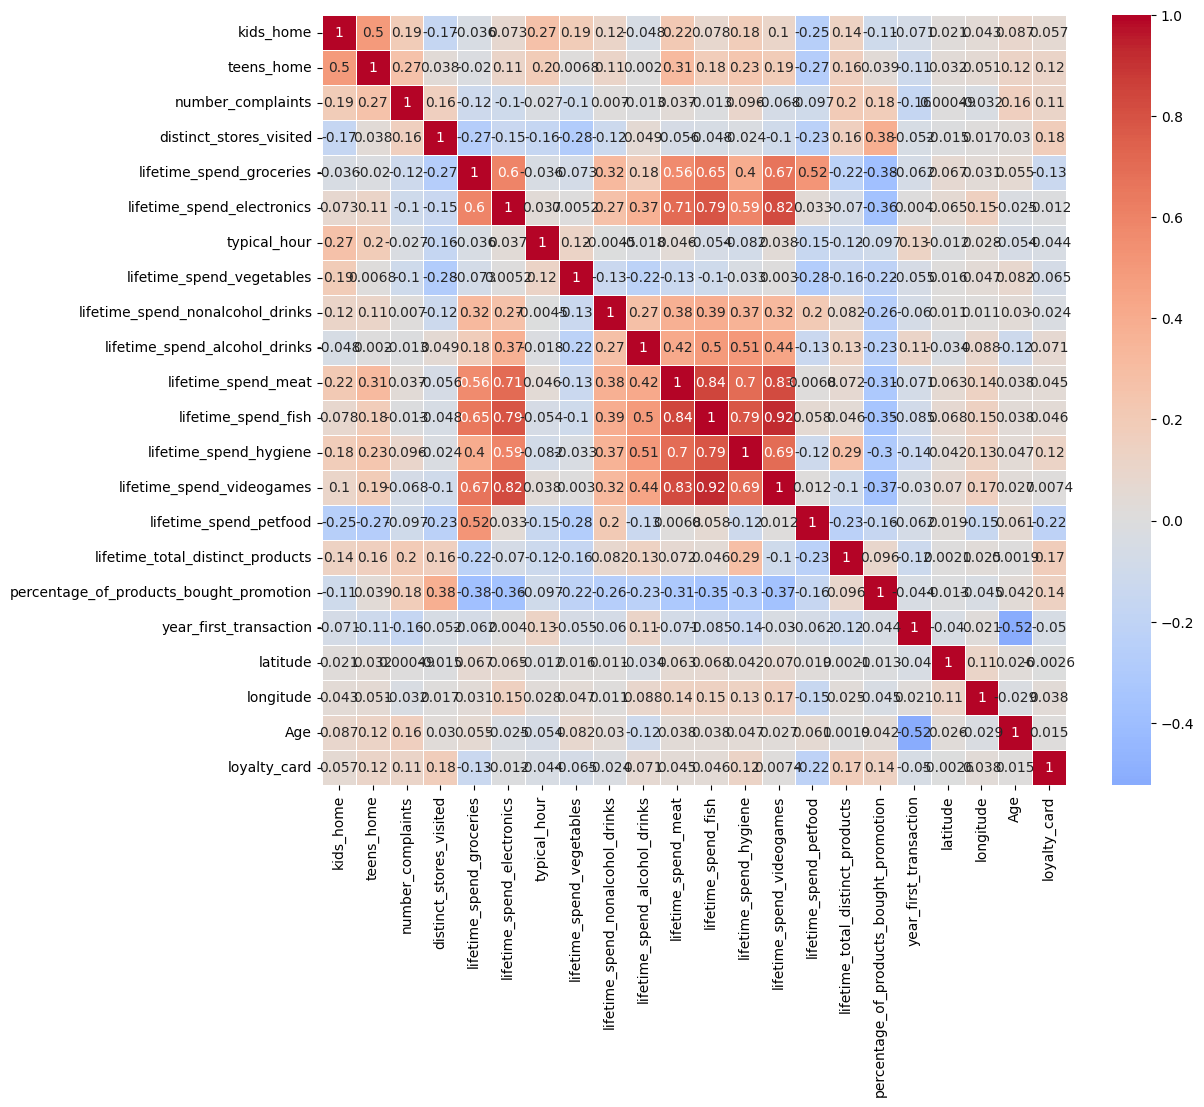

In [106]:
correlation_matrix = customers_scalled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
    
# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

Fish with high correlation with a lot of variables so we tried to remove it but got worse results

# Imputing Missing Values

In [107]:
knn = KNNImputer(n_neighbors= 5).fit(customers_scalled)

In [108]:
customers_imputed = knn.transform(customers_scalled)

In [109]:
cust_prepoc= pd.DataFrame(customers_imputed, columns = customers.columns, index = customers.index)

In [110]:
cust_prepoc.head()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,latitude,longitude,Age,loyalty_card
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,0.111111,0.166667,0.111111,0.142857,0.689440,0.334038,0.611111,0.229167,0.271583,0.185229,...,0.623459,0.732232,0.128291,0.009029,0.328503,0.500000,0.397470,0.478999,0.596774,0.0
43460,0.111111,0.000000,0.111111,0.142857,0.188875,0.062709,0.111111,0.162879,0.168165,0.239049,...,0.606539,0.190759,0.101398,0.724041,0.408523,0.642857,0.636523,0.413765,0.225806,0.0
23937,0.000000,0.166667,0.111111,0.285714,0.116639,0.191463,0.222222,0.142519,0.383094,0.340012,...,0.374534,0.279087,0.102980,0.361738,0.366693,0.464286,0.236664,0.389840,0.532258,1.0
2431,0.000000,0.000000,0.000000,0.000000,0.407691,0.009731,0.611111,0.072443,0.113309,0.011786,...,0.015199,0.000000,0.211012,0.019752,0.414270,0.392857,0.808462,0.472062,0.967742,1.0
10090,0.000000,0.000000,0.000000,0.000000,0.026250,0.026795,0.555556,0.003788,0.014838,0.556472,...,0.168340,0.041381,0.003266,0.001129,0.393475,1.000000,0.704482,0.323561,0.000000,1.0


# KMeans clustering

In [111]:
# Calculating the distances in order to find out the optimal number of clusters
dispersion = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cust_prepoc)
    dispersion.append(kmeans.inertia_)

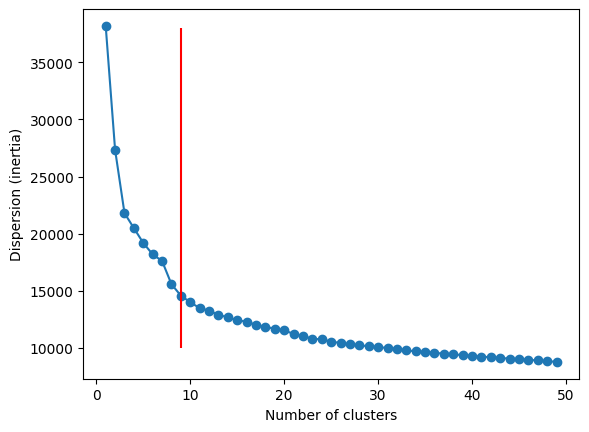

In [112]:
plt.plot(range(1, 50), dispersion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.vlines(9, 10000, 38000, color='red')
plt.show()

In [80]:
#Plotting the silhouette graph
plot_silhouette(cust_prepoc, max_clusters= 12)

KeyboardInterrupt: 

In [81]:
# Create a K-means solution with 100 clusters to then apply the hierarchic clustering to obtain the best number of clusters
cust_copy = cust_prepoc.copy()
kmeans = KMeans(n_clusters=100, random_state=0).fit(cust_prepoc)
cust_copy['cluster_kmeans'] = kmeans.predict(cust_prepoc)

In [82]:
#From the dataset created above (that is a copy of the one after preprocessing) group by centroid 
#so we get the average per centroid to use in the agglomerative clustering

agg_knn = cust_copy.groupby("cluster_kmeans").mean()

In [83]:
# Create the hierarchical algorithm to find the best number of clusters
agg_clust = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None).fit(agg_knn)

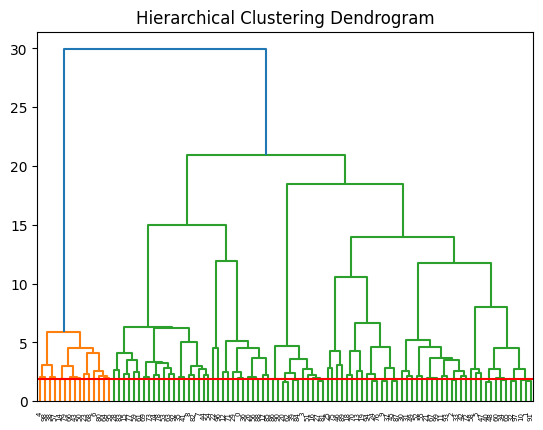

In [84]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 1.925, color = 'r', linestyle = '-')
plt.show()

In [113]:
kmeans_final = KMeans(n_clusters = 8, random_state=0).fit(cust_prepoc)
cust_prepoc["kmeans_cluster"] = kmeans_final.predict(cust_prepoc)

In [86]:
cust_prepoc.head()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,latitude,longitude,Age,loyalty_card,kmeans_cluster
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,-0.073124,0.172233,0.467738,0.312345,2.807064,1.689026,0.757913,0.085110,0.755509,0.847953,...,2.369484,0.161133,-0.870723,-0.826547,-0.288335,-0.588006,0.256037,0.367547,-1.134950,2
43460,-0.073124,-1.017672,0.467738,0.312345,-0.112231,-0.226431,-1.220451,-0.362074,-0.336332,1.369606,...,0.023141,-0.018540,5.282871,-0.115169,0.570464,0.644947,-0.151716,-0.908791,-1.134950,0
23937,-0.879168,0.172233,0.467738,1.276221,-0.533509,0.682515,-0.780815,-0.499423,1.932799,2.348183,...,0.405889,-0.007971,2.164791,-0.487038,-0.503035,-1.417389,-0.301259,0.145576,0.881096,0
2431,-0.879168,-1.017672,-1.131408,-0.651530,1.163904,-0.600430,0.757913,-0.972160,-0.915483,-0.833143,...,-0.803466,0.713789,-0.778443,-0.064080,-0.932435,1.531756,0.212677,1.643886,0.881096,3
10090,-0.879168,-1.017672,-1.131408,-0.651530,-1.060655,-0.479967,1.197550,-1.435315,-1.955106,4.446222,...,-0.624153,-0.674158,-0.938718,-0.248949,2.717463,0.995458,-0.715541,-1.685692,0.881096,7


# SOM clustering

In [114]:
cust_prepoc_array = np.array(cust_prepoc.iloc[:, :-1])

In [115]:
som = MiniSom(
    5,
    3,
    cust_prepoc.iloc[:, :-1].shape[1],
    sigma=0.3,
    learning_rate=0.7,
    neighborhood_function='gaussian',
    random_seed=0
    )

In [90]:
np.random.seed(0)

num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
    som.train_batch(data = cust_prepoc_array, num_iteration= i)
    q_errors.append(som.quantization_error(cust_prepoc_array))

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\minisom.py:540: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


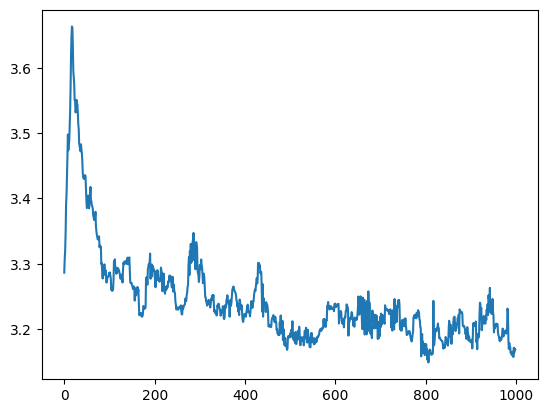

In [91]:
plt.plot(q_errors)

In [116]:
som.train(cust_prepoc_array, 100)
cust_prepoc['winner_node'] = (
    [som.winner(cust_prepoc_array[i]) for i in range(0, len(cust_prepoc_array))]
)

In [117]:
cust_prepoc["winner_node"].unique()

array([(0, 0), (2, 0)], dtype=object)

In [118]:
dict = {}
i = 0
lt = []
for ele in cust_prepoc["winner_node"]:
    if ele in dict:
        lt.append(dict[ele]) 
    else:
        dict[ele] = i
        lt.append(dict[ele])
        i += 1

In [119]:
cust_prepoc["winner_node"] = pd.Series(lt)

In [120]:
cust_prepoc

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,latitude,longitude,Age,loyalty_card,kmeans_cluster,winner_node
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,0.111111,0.166667,0.111111,0.142857,0.689440,0.334038,0.611111,0.229167,0.271583,0.185229,...,0.128291,0.009029,0.328503,0.500000,0.397470,0.478999,0.596774,0.0,3,0.0
43460,0.111111,0.000000,0.111111,0.142857,0.188875,0.062709,0.111111,0.162879,0.168165,0.239049,...,0.101398,0.724041,0.408523,0.642857,0.636523,0.413765,0.225806,0.0,1,NaN
23937,0.000000,0.166667,0.111111,0.285714,0.116639,0.191463,0.222222,0.142519,0.383094,0.340012,...,0.102980,0.361738,0.366693,0.464286,0.236664,0.389840,0.532258,1.0,0,0.0
2431,0.000000,0.000000,0.000000,0.000000,0.407691,0.009731,0.611111,0.072443,0.113309,0.011786,...,0.211012,0.019752,0.414270,0.392857,0.808462,0.472062,0.967742,1.0,6,0.0
10090,0.000000,0.000000,0.000000,0.000000,0.026250,0.026795,0.555556,0.003788,0.014838,0.556472,...,0.003266,0.001129,0.393475,1.000000,0.704482,0.323561,0.000000,1.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,0.111111,0.166667,0.000000,0.000000,0.270752,0.295821,0.611111,0.321023,0.333183,0.125516,...,0.143499,0.003950,0.424663,0.714286,0.618787,0.384052,0.290323,0.0,3,NaN
24856,0.111111,0.166667,0.111111,0.000000,0.423245,0.540121,0.333333,0.285038,0.250450,0.295227,...,0.139110,0.007054,0.321799,0.642857,0.615128,0.381284,0.145161,1.0,5,0.0
21373,0.000000,0.000000,0.000000,0.000000,0.228194,0.011329,0.333333,0.136837,0.188849,0.008446,...,0.573689,0.012415,0.343708,0.750000,0.700302,0.298395,0.129032,0.0,4,0.0


## DBScan

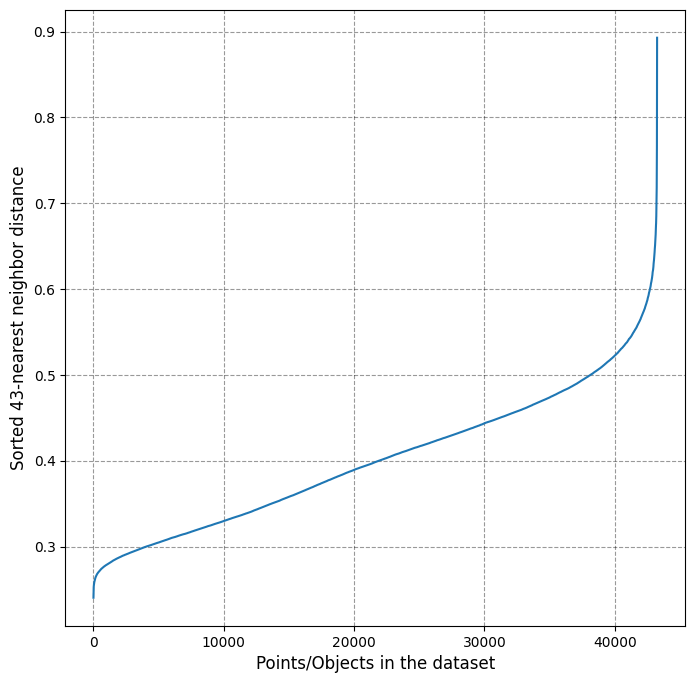

In [121]:
k = 2 * cust_prepoc.iloc[:, :-2].shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=cust_prepoc.iloc[:, :-2], k=k)

In [122]:
cust_prepoc['dbscan_clustering'] = DBSCAN(
    eps=0.58, min_samples=k
    ).fit_predict(cust_prepoc.iloc[:, :-2])

In [123]:
cust_prepoc['dbscan_clustering'].value_counts()

dbscan_clustering
 2    24340
 1    16067
 0     2821
-1       15
Name: count, dtype: int64

## UMAP

In [124]:
umap_object = umap.UMAP(n_neighbors=100, min_dist=0.7, random_state=0)

In [125]:
cust_prepoc = cust_prepoc.sort_index()

In [126]:
umap_embedding = umap_object.fit_transform(cust_prepoc.iloc[:, :-3])

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


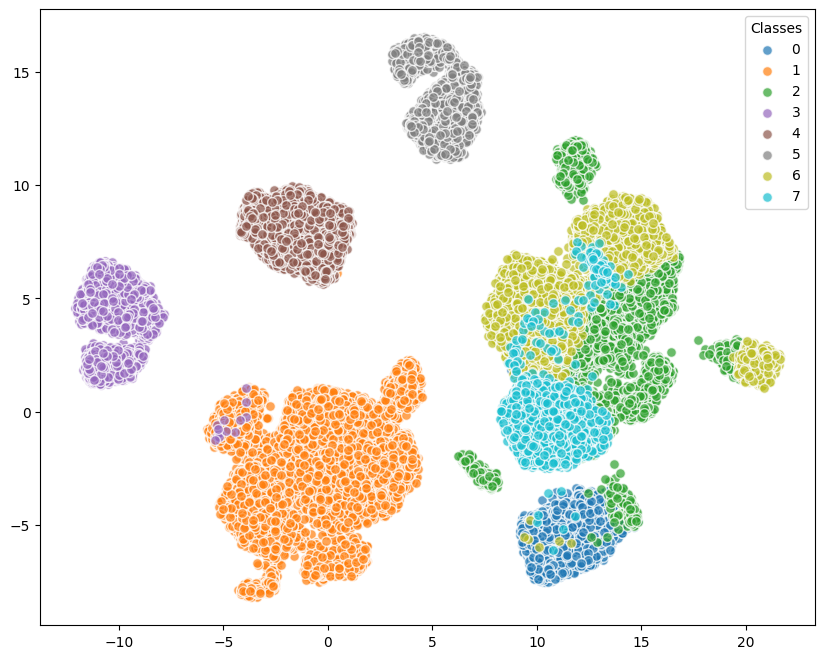

In [78]:
visualize_dimensionality_reduction_umap(umap_embedding, cust_prepoc.iloc[:,-3].sort_index())

In [100]:
umap_object_2 = umap.UMAP(n_neighbors=100, min_dist=0.7, random_state=0)

In [101]:
umap_embedding_2 = umap_object_2.fit_transform(cust_prepoc.iloc[:, :-3])

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


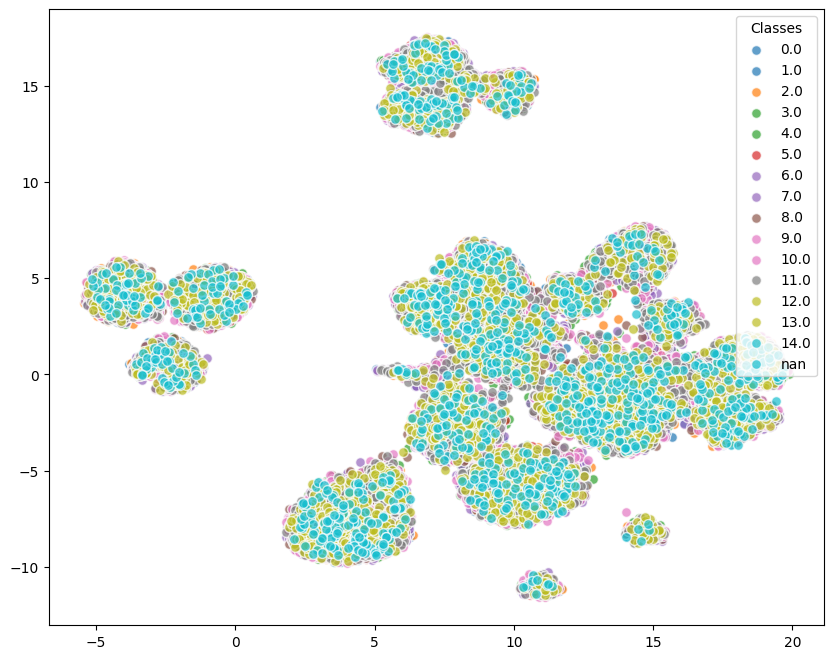

In [102]:
visualize_dimensionality_reduction_umap(umap_embedding_2, cust_prepoc.iloc[:,-2].sort_index())

In [82]:
umap_object_3 = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=0)

In [83]:
umap_embedding_3 = umap_object_3.fit_transform(cust_prepoc.iloc[:, :-3])

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


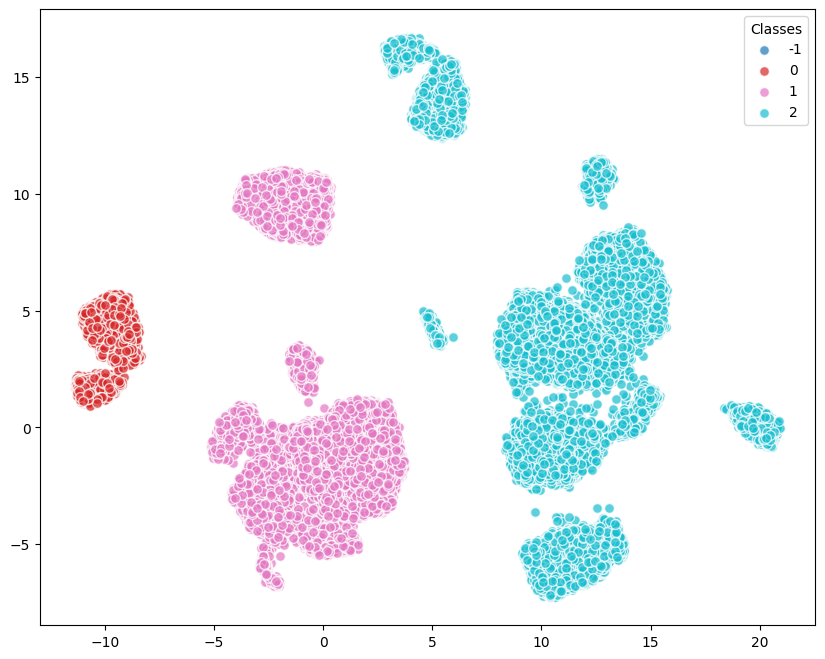

In [84]:
visualize_dimensionality_reduction_umap(umap_embedding_3, cust_prepoc.iloc[:,-1].sort_index())

# Improving kmeans clusters using dbscan

In [91]:
new_data = cust_prepoc.iloc[:,:-2]
#vals = np.array(new_data["kmeans_cluster"])
#min_val = np.min(vals, axis=0)
#max_val = np.max(vals, axis=0)

#new_data["kmeans_cluster"] = new_data["kmeans_cluster"].apply(lambda x: (x - min_val) / (max_val - min_val))

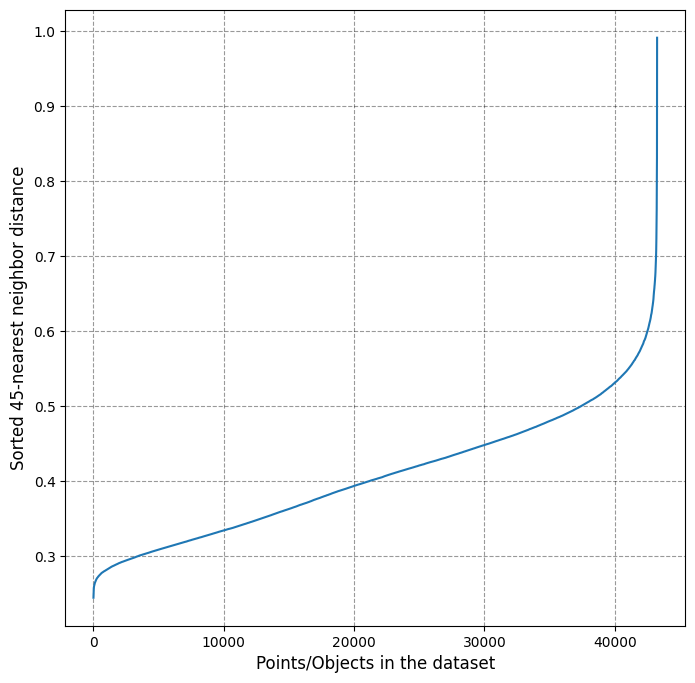

In [93]:
k = 2 * new_data.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=new_data, k=k)

In [94]:
new_data['dbscan_clustering'] = DBSCAN(
    eps=0.6, min_samples=k
    ).fit_predict(new_data)

In [95]:
new_data['dbscan_clustering'].value_counts()

dbscan_clustering
 6    12677
 0     7768
 2     6032
 3     3983
 4     3731
 5     3381
 7     2823
 1     2821
-1       27
Name: count, dtype: int64

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


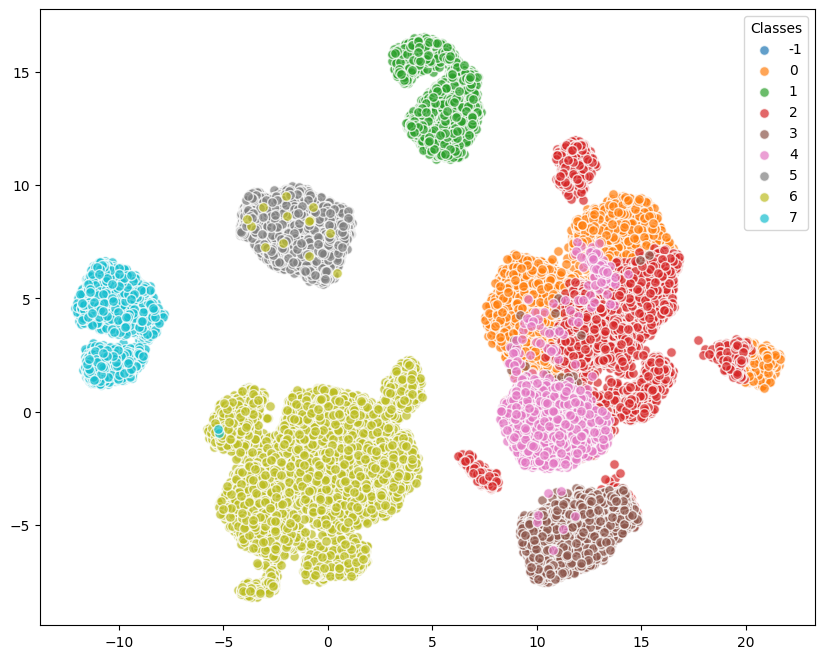

In [97]:
umap_object4 = umap.UMAP(n_neighbors=100, min_dist=0.7, random_state=0)
new_data = new_data.sort_index()
umap_embedding4 = umap_object4.fit_transform(new_data.iloc[:,:-2])
visualize_dimensionality_reduction_umap(umap_embedding4, new_data.iloc[:, -1].sort_index())

# Analysis of joined clusters (clusters 8, 2 and also 0, 4, 9)

In [ ]:
cust_prepoc

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,latitude,longitude,Age,loyalty_card,kmeans_cluster,winner_node,dbscan_clustering
customer_id,,,,,,,,,,,,,,,,,,,,,
39634,0.111111,0.166667,0.111111,0.142857,0.689440,0.334038,0.611111,0.229167,0.271583,0.185229,...,0.009029,0.328503,0.500000,0.397470,0.478915,0.596774,0.0,6,0.0,0
43460,0.111111,0.000000,0.111111,0.142857,0.188875,0.062709,0.111111,0.162879,0.168165,0.239049,...,0.724041,0.408523,0.642857,0.636523,0.413670,0.225806,0.0,9,NaN,3
23937,0.000000,0.166667,0.111111,0.285714,0.116639,0.191463,0.222222,0.142519,0.383094,0.340012,...,0.361738,0.366693,0.464286,0.236664,0.389742,0.532258,1.0,3,0.0,1
2431,0.000000,0.000000,0.000000,0.000000,0.407691,0.009731,0.611111,0.072443,0.113309,0.011786,...,0.019752,0.414270,0.392857,0.808462,0.471977,0.967742,1.0,8,0.0,1
10090,0.000000,0.000000,0.000000,0.000000,0.026250,0.026795,0.555556,0.003788,0.014838,0.556472,...,0.001129,0.393475,1.000000,0.704482,0.323452,0.000000,1.0,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48487,0.111111,0.166667,0.000000,0.000000,0.270752,0.295821,0.611111,0.321023,0.333183,0.125516,...,0.003950,0.424663,0.714286,0.618787,0.383952,0.290323,0.0,6,NaN,0
24856,0.111111,0.166667,0.111111,0.000000,0.423245,0.540121,0.333333,0.285038,0.250450,0.295227,...,0.007054,0.321799,0.642857,0.615128,0.381184,0.145161,1.0,5,0.0,2
21373,0.000000,0.000000,0.000000,0.000000,0.228194,0.011329,0.333333,0.136837,0.188849,0.008446,...,0.012415,0.343708,0.750000,0.700302,0.298282,0.129032,0.0,0,0.0,3


In [ ]:
cust_kmeans_clusters = cust_prepoc[["kmeans_cluster"]]

In [ ]:
cust_kmeans_clusters

,kmeans_cluster
customer_id,
39634,6
43460,9
23937,3
2431,8
10090,2
...,...
48487,6
24856,5
21373,0


In [ ]:
og_cluster = customer_info.merge(cust_kmeans_clusters, on='customer_id', how= "left")

In [ ]:
og_cluster["kmeans_cluster"] = og_cluster["kmeans_cluster"].fillna(10)

In [ ]:
og_cluster.columns

Index(['customer_name', 'customer_birthdate', 'kids_home', 'teens_home',
       'number_complaints', 'distinct_stores_visited',
       'lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card_number', 'latitude', 'longitude', 'Age', 'loyalty_card',
       'customer_gender_male', 'kmeans_cluster'],
      dtype='object')

In [ ]:
mean_clusters = og_cluster.groupby("kmeans_cluster").agg({
    'customer_birthdate': np.mean,
    'kids_home': np.mean,
    'teens_home': np.mean,
    'number_complaints': np.mean,
    'distinct_stores_visited': np.mean,
    'lifetime_spend_groceries': np.mean,
    'lifetime_spend_electronics': np.mean,
    'typical_hour': np.mean,
    'lifetime_spend_vegetables': np.mean,
    'lifetime_spend_nonalcohol_drinks': np.mean,
    'lifetime_spend_alcohol_drinks': np.mean,
    'lifetime_spend_meat': np.mean,
    'lifetime_spend_fish': np.mean,
    'lifetime_spend_hygiene': np.mean,
    'lifetime_spend_videogames': np.mean,
    'lifetime_spend_petfood': np.mean,
    'lifetime_total_distinct_products': np.mean,
    'percentage_of_products_bought_promotion': np.mean,
    'year_first_transaction': np.mean,
    'loyalty_card_number': np.mean,
    'latitude': np.mean,
    'longitude': np.mean,
    'Age': np.mean,
    'loyalty_card': np.mean,
    'customer_gender_male': np.mean
})


C:\Users\joaof\AppData\Local\Temp\ipykernel_42264\2218242307.py:1: FutureWarning: The provided callable <function mean at 0x0000025CE89C6200> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_clusters = og_cluster.groupby("kmeans_cluster").agg({


In [ ]:
mean_clusters

,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,Age,loyalty_card,customer_gender_male
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0.0,1968-08-28 15:04:55.711574952,0.000000,0.013264,0.493740,1.000000,10261.225490,159.336812,11.800990,197.066580,498.392473,...,10155.617963,51.843137,0.197721,2010.846300,NaN,38.748730,-9.174247,55.174889,0.000000,0.495572
1.0,1965-02-20 00:54:49.038287616,2.540244,1.732735,1.042318,1.381636,4925.328912,1983.445282,15.663112,437.258233,525.672897,...,1229.517938,651.126017,0.202482,2009.278866,NaN,38.749047,-9.156625,58.700030,0.000000,0.499548
2.0,1991-03-04 20:32:48.822927360,0.635735,0.550621,0.553766,1.840613,3320.351075,1153.769191,13.797475,420.065840,359.628454,...,1057.183896,354.004265,0.278947,2015.023883,949870.740362,38.747334,-9.155634,32.654043,1.000000,0.502047
3.0,1968-10-28 22:08:06.478069040,1.019417,0.846378,0.993947,1.984999,5053.325980,2118.740202,9.476641,303.408923,598.019465,...,1964.946276,1053.474436,0.200013,2008.361017,949643.425383,38.747924,-9.156651,54.988840,1.000000,0.502466
4.0,1961-05-05 06:47:51.979959936,0.880252,0.629963,0.658874,1.760116,2624.048096,397.918236,13.174402,722.287408,342.390381,...,547.007214,292.500401,0.258441,2009.878557,NaN,38.748144,-9.157169,62.489178,0.000000,0.496794
5.0,1969-02-13 14:08:17.501820828,1.002206,0.992900,0.496130,1.392884,14011.451930,8137.184632,13.659550,501.903274,603.448653,...,3004.205390,101.005098,0.050455,2011.106701,949714.613620,38.752189,-9.146023,54.705025,1.000000,0.502549
6.0,1969-06-22 16:32:11.903544026,1.001850,0.999253,0.502976,1.385338,13986.685057,8112.028133,13.609470,497.259232,589.766533,...,2996.537815,100.282791,0.049075,2011.171355,NaN,38.751914,-9.146088,54.362075,0.000000,0.491049
7.0,1967-08-31 08:28:50.215588720,3.202688,2.062482,1.005043,1.125892,4963.818961,1971.416528,18.466821,509.052528,497.807905,...,979.340243,505.233554,0.196986,2010.638198,949681.739359,38.750416,-9.155232,56.162244,1.000000,0.489497
8.0,1959-05-05 03:17:21.796502400,0.697095,0.742753,0.812122,2.258139,2988.260334,332.517753,12.506071,467.980504,336.129571,...,1262.172496,325.933095,0.355874,2009.791865,949879.050609,38.747382,-9.158382,64.484102,1.000000,0.499338


In [ ]:
mean_clusters_view = mean_clusters.drop(columns = "customer_birthdate")

In [3]:
# Bar plots for each variable
for column in mean_clusters_view.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=mean_clusters_view.index, y=column, data=mean_clusters_view)
        plt.title(f'Bar Plot of {column} for Each Cluster')
        plt.show()

NameError: name 'mean_clusters_view' is not defined

In [2]:
mean_standard_clusters = cust_prepoc.iloc[:-2].groupby("kmeans_cluster").mean()

# Select the columns to be visualized
categories = mean_standard_clusters.columns.tolist()

# Create a radar chart for each cluster
for cluster in mean_standard_clusters.index.tolist():
    create_radar_chart(mean_standard_clusters, cluster, categories)


NameError: name 'cust_prepoc' is not defined

# Extra dps tem de se ver se vale a pena ficar

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

cust_prepoc.drop(columns = "GMM Clusters", inplace=True)
# Apply K-means
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_labels = kmeans.fit_predict(cust_prepoc)


# Fit GMM on inliers
gmm = GaussianMixture(n_components=12, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(cust_prepoc)

print("Cluster labels after GMM refinement:", gmm_labels)


Cluster labels after GMM refinement: [6 4 3 ... 0 7 3]


In [ ]:
cust_prepoc["GMM Clusters"] = pd.Series(gmm_labels)

C:\Users\joaof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


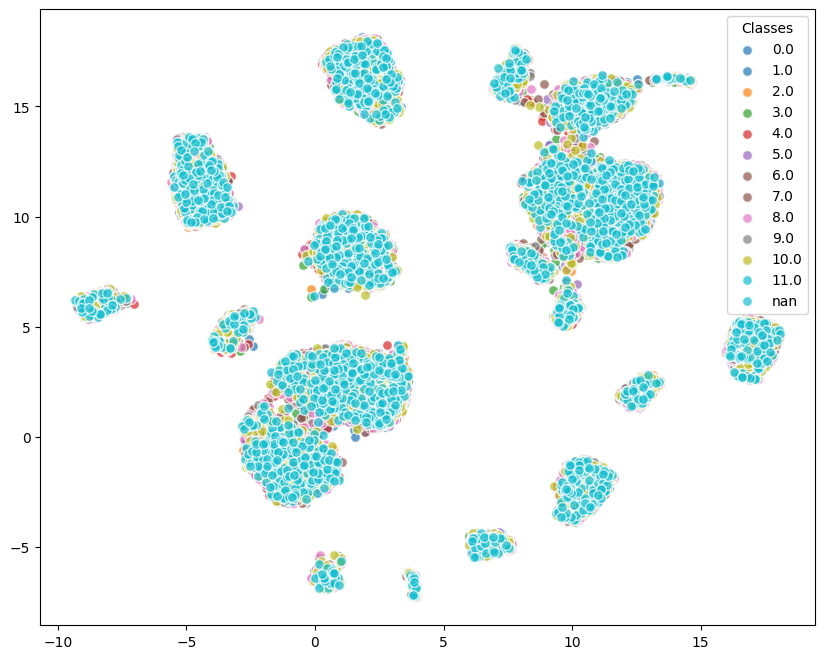

In [ ]:
umap_object_3 = umap.UMAP(n_neighbors=15, min_dist=0.3, random_state=0)
umap_embedding_3 = umap_object_3.fit_transform(cust_prepoc.iloc[:, :-1])
visualize_dimensionality_reduction_umap(umap_embedding_3, cust_prepoc.iloc[:,-1].sort_index())